In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt
%matplotlib inline

Here we use the Implicit method to solve the parabolic PDE (heat equation) for $u(t,x) \in \mathbb{R}$ subject to Dirichlet BC's and initial condition:


$U_t - aU_{xx}= f(t, x) \space \space \text{for}\space t \in (0,T], \space x \in (0,1)\\$

$U(t,0)=g_0,\\$
$U(t,1)=g_1,\\$
$U(0,x)=U_0(x)\\$


with $a>0$ (heat-conduction coefficient), $T>0$ and $U_0: (0,1) \rightarrow \mathbb{R}$

In [2]:
def plot_sol(xmesh, u_computed, l_BC, r_BC, u_true=None):
    
    # Assembre complete solution with BCs
    sol = np.zeros(n_x+1)
    sol[0] = l_BC
    sol[1:-1] = uh
    sol[-1] = r_BC
    
    fig = pt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(xmesh, sol, 'ro', label = 'computed')
    if(u_true is not None): ax.plot(xmesh, u_true, 'b-', label = 'true')
    ax.set_title(r"Heat Equation @ time: "+str(t))
    ax.legend(loc='upper left')
    ax.set_xlabel('x space')
    ax.set_ylabel('u(x,'+str(t)+') state') 

In [3]:
# True solution function
def true_sol(t, x):
    #return np.exp(-t)*np.sin(np.pi*x) + np.exp(-4*t)*np.sin(2*np.pi*x) # Epperson Example
    return np.exp(-4*t)*np.sin(2*np.pi*x) + x # Function on CW
    #return np.exp(-(np.pi**2)*t)*np.sin(np.pi*x) # Epperson excercise

# Right Hand Side f(t, x)
def rhs_f(t, xvec):
    return np.zeros(xvec.size)

# Initial condition function u0(x) 
def u_0(x): 
    #return np.sin(np.pi*x) + np.sin(2*np.pi*x) # Epperson Example
    return np.sin(2*np.pi*x) + x # Function on CW
    #return np.sin(np.pi*x) # Epperson excercise

In [4]:
# Data for numerical method.
n_x = 16
n_t = 64
T = 1
a = 1/(np.pi**2)
#a = 1
g0 = 0
g1 = 1

In [5]:
# Meshes
xs = np.linspace(0,1, n_x+1)
h = xs[1] - xs[0]
ts = np.linspace(0,T, n_t+1)
dt = ts[1] - ts[0]

In [12]:
print(h)
print(dt/(h*h))

0.125
1.0


In [6]:
# Courant-Friedrichs-Loewy coefficient.
cfl = a * dt / h / h

In [7]:
# Inner tridiagonal matrix
first_row = np.zeros(n_x-1)
first_row[0] = 2
first_row[1] = -1
K = la.toeplitz([first_row])
#print(K)

In [8]:
I = np.eye(n_x-1)

At time:0.0	uh = [ 0.44518343  0.83210678  1.11137953  1.25        1.23637953  1.08210678
  0.82018343  0.5         0.17981657 -0.08210678 -0.23637953 -0.25
 -0.11137953  0.16789322  0.55481657]
At time:0.015625	uh = [ 0.42294372  0.79101315  1.05768812  1.19188483  1.18268812  1.04101315
  0.79794372  0.5         0.20205628 -0.04101315 -0.18268812 -0.19188483
 -0.05768812  0.20898685  0.57705628]
At time:0.03125	uh = [ 0.40199647  0.75230769  1.00711699  1.13714704  1.13211699  1.00230769
  0.77699647  0.5         0.22300353 -0.00230769 -0.13211699 -0.13714704
 -0.00711699  0.24769231  0.59800353]
At time:0.046875	uh = [ 0.38226658  0.7158516   0.95948481  1.08559034  1.08448481  0.9658516
  0.75726658  0.5         0.24273342  0.0341484  -0.08448481 -0.08559034
  0.04051519  0.2841484   0.61773342]
At time:0.0625	uh = [ 0.36368329  0.68151416  0.91462079  1.03702987  1.03962079  0.93151416
  0.73868329  0.5         0.26131671  0.06848584 -0.03962079 -0.03702987
  0.08537921  0.3184858

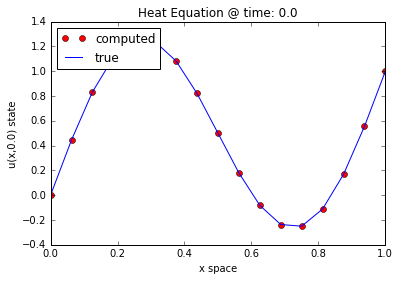

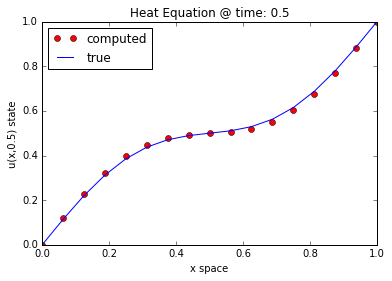

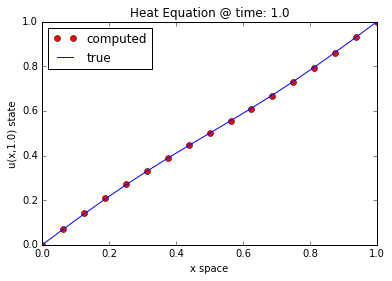

In [10]:
uh = u_0(xs[1:-1])
for t in ts:
    
    print ("At time:" + str(t)+ "\tuh = "+str(uh))
    
    # Right Hand Side
    rhs = rhs_f(t+dt,xs[1:-1])
    rhs[0] = rhs[0] + (a/(h**2))*g0 # Include Left BC
    rhs[-1] = rhs[-1] + (a/(h**2))*g1 # Include Right BC
 
    u_true = true_sol(t, xs)
    
    if(t == 0 or t == 0.5 or t==1): plot_sol(xs, uh, g0, g1, u_true)
           
    uh = la.solve( (I + cfl*K), (uh+rhs*dt) ) 